In [1]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.linear_model import SGDClassifier, LogisticRegression
from keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import tree

In [4]:
train_data=pd.read_csv('/content/drive/MyDrive/cleaned_data.csv', index_col=0)

In [5]:
test_data=pd.read_csv('/content/drive/MyDrive/cleanedTest_data.csv', index_col=0)

In [6]:
train_data.head(3)

,speaker,statement,paragraph_based_content,fullText_based_content,label_fnn,source,polarity,length
0,Joe Wilkinson,national organization say georgia one america ...,coalition government watchdog group last week ...,coalition government watchdog group last week ...,fake,www.ajc.com,-0.027052,409
1,Rick Scott,say barack obama health care law big job kille...,supreme court justice embark three day oral ar...,supreme court justice embark three day oral ar...,fake,www.youtube.com,-0.062596,571
2,J.D. Alexander,say southwest florida water management distric...,new one senate budget committee chairman say w...,new one senate budget committee chairman say w...,fake,www.tampabay.com,0.037204,444


In [7]:
test_data.head(3)

,speaker,statement,paragraph_based_content,fullText_based_content,label_fnn,source
0,Jon Kyl,president obama attempt filibuster justice ali...,supreme court justice john paul stevens announ...,supreme court justice john paul stevens announ...,real,abcnews.go.com
1,Michael Steele,hawaii history throw incumbent office,abc week chairman republican democratic nation...,abc week chairman republican democratic nation...,real,www.starbulletin.com
2,John Boehner,national debt track exceed size entire economy...,ever since barack obama become president begin...,ever since barack obama become president begin...,real,www.desmoinesregister.com


In [8]:
train_data.drop(columns=['polarity', 'length'], inplace=True)

In [9]:
vocab_size=500
embedding_vector=10

### Model building on column statement for further comparison

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# data vectorizer
vectorizer = CountVectorizer(analyzer = "word", 
                             binary = True, 
                             min_df =2,
                             stop_words='english')
array_sentence = vectorizer.fit_transform(train_data['statement']).toarray()
training_data = pd.DataFrame(array_sentence, columns=vectorizer.get_feature_names())

In [11]:
train_data.shape

(15212, 6)

In [12]:
training_data.shape

(15212, 6623)

In [13]:
labels=train_data['label_fnn']

In [14]:
train_data['label_fnn'].replace({'fake': 0, 'real': 1}, inplace=True)

### Splitting the data into train and test data.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=.2)

### Applying MultinomialNB to test out the suitability of descrete features in data.

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
y_predict_train = model.predict(X_train)
train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing error
y_predict_test = model.predict(X_test)
test_acc = accuracy_score(y_test,y_predict_test)

In [18]:
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))

Training Accuracy: 74.30%
Testing Accuracy: 61.55%


### Using different datasets, train_data for training and for test_data for testing.

### Here I will be testing the accuracy for Linear, Logistic regression, Decision Tree and MultinomialNB and later compare the accuracy of each model.

In [22]:
test_data['label_fnn'].replace({'fake': 0, 'real': 1}, inplace=True)

### LinearSVC

In [35]:
pipeline_Linear = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline_Linear.fit(train_data['statement'],train_data['label_fnn'])

In [36]:
pred=pipeline_Linear.predict(test_data['statement'])

### Accuracy of LinearSVC 

In [79]:
print("Accuracy : ",accuracy_score(pred,test_data['label_fnn']))
acc_linear=accuracy_score(pred,test_data['label_fnn'])*100

Accuracy :  0.6736242884250474


### Logistic Regression

In [38]:
pipeline_Logistic = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        (('c', LogisticRegression()))
    ])
fit = pipeline_Logistic.fit(train_data['statement'],train_data['label_fnn'])

In [39]:
pred_logistic=pipeline_Logistic.predict(test_data['statement'])

### Accuracy of Logistic Regression

In [78]:
print("Accuracy : ",accuracy_score(pred_logistic,test_data['label_fnn']))
acc_logistic=accuracy_score(pred_logistic,test_data['label_fnn'])*100

Accuracy :  0.683111954459203


### Decision Tree

In [27]:
pipeline_decisiontree = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline_decisiontree.fit(train_data['statement'],train_data['label_fnn'])

In [28]:
pred_tree=pipeline_decisiontree.predict(test_data['statement'])

### Accuracy

In [77]:
print("Accuracy : ",accuracy_score(pred_tree,test_data['label_fnn']))
acc_tree=accuracy_score(pred_tree,test_data['label_fnn'])*100

Accuracy :  0.6129032258064516


### MultinomialNB

In [41]:
pipeline_Multinomial = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', MultinomialNB())
    ])
fit = pipeline_Multinomial.fit(train_data['statement'],train_data['label_fnn'])

In [42]:
pred_multinomial=pipeline_Multinomial.predict(test_data['statement'])

In [74]:
print("Accuracy : ",accuracy_score(pred_multinomial,test_data['label_fnn']))
acc_multinomial=accuracy_score(pred_multinomial,test_data['label_fnn'])*100

Accuracy :  0.7182163187855788


In [80]:
#make dataset here

accuracy_data = {'Supervised ML Models':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Multinomial'],
        'Accuracy':[acc_linear, acc_logistic, acc_tree, acc_multinomial]}
  
# Create DataFrame
df_statement_accuracy = pd.DataFrame(accuracy_data)

### comparing all the accuracies

In [81]:
df_statement_accuracy

,Supervised ML Models,Accuracy
0,Linear Regression,67.362429
1,Logistic Regression,68.311195
2,Decision Tree,61.290323
3,Multinomial,71.821632


### Bar graph shows Decision tree has the lowest accuracy and MultinomialNB has the highest accuracy which explains it did good job in validating descrete features.

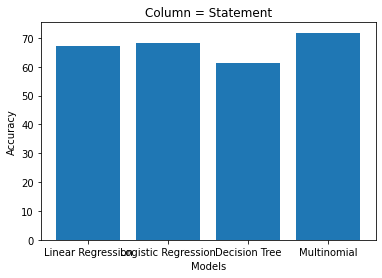

In [82]:
plt.bar(df_statement_accuracy['Supervised ML Models'], df_statement_accuracy['Accuracy'])
plt.title('Column = Statement')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Model building on column paragraph_based_content for further comparison

In [44]:
fit = pipeline_Linear.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [45]:
pred_para=pipeline_Linear.predict(test_data['paragraph_based_content'])

In [83]:
print("Accuracy : ",accuracy_score(pred_para,test_data['label_fnn']))
acc_para_linear=accuracy_score(pred_para,test_data['label_fnn'])*100

Accuracy :  0.8036053130929791


In [47]:
fit = pipeline_Logistic.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [48]:
pred_logistic_para=pipeline_Logistic.predict(test_data['paragraph_based_content'])

In [84]:
print("Accuracy : ",accuracy_score(pred_logistic_para,test_data['label_fnn']))
acc_para_logistic=accuracy_score(pred_logistic_para,test_data['label_fnn'])*100

Accuracy :  0.8045540796963947


In [50]:
fit = pipeline_decisiontree.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [51]:
pred_tree_para=pipeline_decisiontree.predict(test_data['paragraph_based_content'])

In [85]:
print("Accuracy : ",accuracy_score(pred_tree_para,test_data['label_fnn']))
acc_para_tree=accuracy_score(pred_tree_para,test_data['label_fnn'])*100

Accuracy :  0.683111954459203


In [53]:
fit = pipeline_Multinomial.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [54]:
pred_multinomial_para=pipeline_Multinomial.predict(test_data['paragraph_based_content'])

In [86]:
print("Accuracy : ",accuracy_score(pred_multinomial_para,test_data['label_fnn']))
acc_para_multinomial=accuracy_score(pred_multinomial_para,test_data['label_fnn'])*100

Accuracy :  0.7590132827324478


In [87]:
#make dataset here

accuracy_para_data = {'Supervised ML Models':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Multinomial'],
        'Accuracy':[acc_para_linear, acc_para_logistic, acc_para_tree, acc_para_multinomial]}
  
# Create DataFrame
df_para_accuracy = pd.DataFrame(accuracy_para_data)

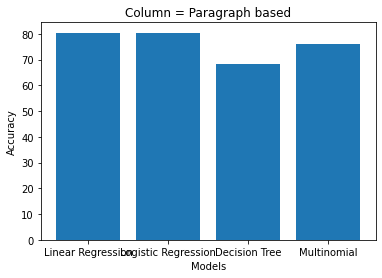

In [98]:
plt.bar(df_para_accuracy['Supervised ML Models'], df_para_accuracy['Accuracy'])
plt.title('Column = Paragraph based')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Model building on column fullText_based_content for further comparison

In [56]:
fit = pipeline_Linear.fit(train_data['fullText_based_content'],train_data['label_fnn'])

In [57]:
pred_fullText=pipeline_Linear.predict(test_data['fullText_based_content'])

In [89]:
print("Accuracy : ",accuracy_score(pred_fullText,test_data['label_fnn']))
acc_fullText_Linear=accuracy_score(pred_fullText,test_data['label_fnn'])*100

Accuracy :  0.8026565464895635


In [59]:
fit = pipeline_Logistic.fit(train_data['fullText_based_content'],train_data['label_fnn'])

In [60]:
pred_logistic_fullText=pipeline_Logistic.predict(test_data['fullText_based_content'])

In [90]:
print("Accuracy : ",accuracy_score(pred_logistic_fullText,test_data['label_fnn']))
acc_fullText_logistic=accuracy_score(pred_logistic_fullText,test_data['label_fnn'])*100

Accuracy :  0.8045540796963947


In [62]:
fit = pipeline_decisiontree.fit(train_data['fullText_based_content'],train_data['label_fnn'])

In [63]:
pred_tree_fullText=pipeline_decisiontree.predict(test_data['fullText_based_content'])

In [91]:
print("Accuracy : ",accuracy_score(pred_tree_fullText,test_data['label_fnn']))
acc_fullText_tree=accuracy_score(pred_tree_fullText,test_data['label_fnn'])*100

Accuracy :  0.6916508538899431


In [65]:
fit = pipeline_Multinomial.fit(train_data['fullText_based_content'],train_data['label_fnn'])
pred_multinomial_fullText=pipeline_Multinomial.predict(test_data['fullText_based_content'])
print("Accuracy : ",accuracy_score(pred_multinomial_fullText,test_data['label_fnn']))

Accuracy :  0.7590132827324478


In [92]:
acc_fullText_multinomial=accuracy_score(pred_multinomial_fullText,test_data['label_fnn'])*100

In [95]:
#make dataset here

accuracy_fullText_data = {'Supervised ML Models':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Multinomial'],
        'Accuracy':[acc_fullText_Linear, acc_fullText_logistic, acc_fullText_tree, acc_fullText_multinomial]}
  
# Create DataFrame
df_fullText_accuracy = pd.DataFrame(accuracy_fullText_data)

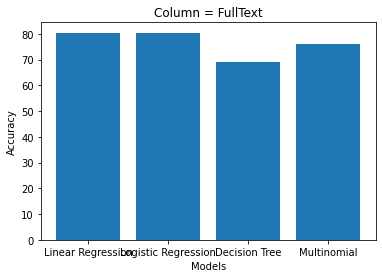

In [97]:
plt.bar(df_fullText_accuracy['Supervised ML Models'], df_fullText_accuracy['Accuracy'])
plt.title('Column = FullText')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Comparing all the models tested on 3 columns namely, statement, paragraph based reviews and full text based reviews to compare which type of data performed the best. All the models performed good for both paragraph based and full text based but decision tree performed a little less on paragraph based text. 

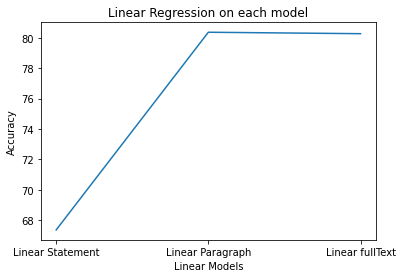

In [101]:
linearity=['Linear Statement', 'Linear Paragraph', 'Linear fullText']
accuracy_linearity=[acc_linear, acc_para_linear, acc_fullText_Linear]
plt.plot(linearity, accuracy_linearity)
plt.title('Linear Regression on each model')
plt.xlabel('Linear Models')
plt.ylabel('Accuracy')
plt.show()

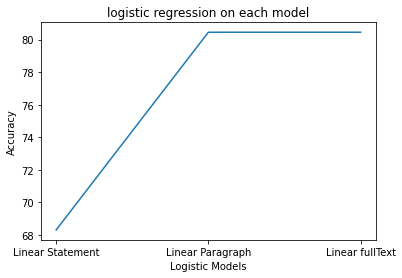

In [102]:
logistics=['Logistic Statement', 'Logistic Paragraph', 'Logistic fullText']
accuracy_logistics=[acc_logistic, acc_para_logistic, acc_fullText_logistic]
plt.plot(linearity, accuracy_logistics)
plt.title('logistic regression on each model')
plt.xlabel('Logistic Models')
plt.ylabel('Accuracy')
plt.show()

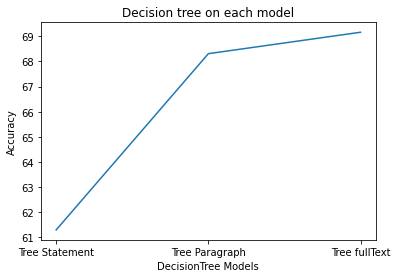

In [103]:
tree=['Tree Statement', 'Tree Paragraph', 'Tree fullText']
accuracy_tree=[acc_tree, acc_para_tree, acc_fullText_tree]
plt.plot(tree, accuracy_tree)
plt.title('Decision tree on each model')
plt.xlabel('DecisionTree Models')
plt.ylabel('Accuracy')
plt.show()

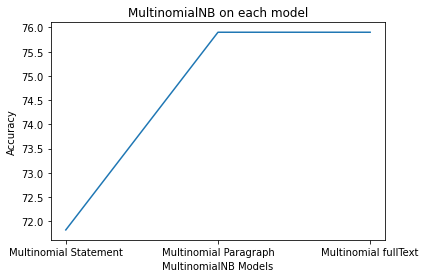

In [104]:
multinomialNB=['Multinomial Statement', 'Multinomial Paragraph', 'Multinomial fullText']
accuracy_multinomialNB=[acc_multinomial, acc_para_multinomial, acc_fullText_multinomial]
plt.plot(multinomialNB, accuracy_multinomialNB)
plt.title('MultinomialNB on each model')
plt.xlabel('MultinomialNB Models')
plt.ylabel('Accuracy')
plt.show()